# Winsconsis Breast Cancer
## Binary classification problem


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/breastcancer.jpg" width="1500">

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
#%tensorflow_version 1.x

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                        names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
                               "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
                               "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
                               "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
                               "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst",
                               "fractal_dimension_worst"])

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Creiamo gli array numpy per addestrare e testare la nostra rete neurale.

In [5]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


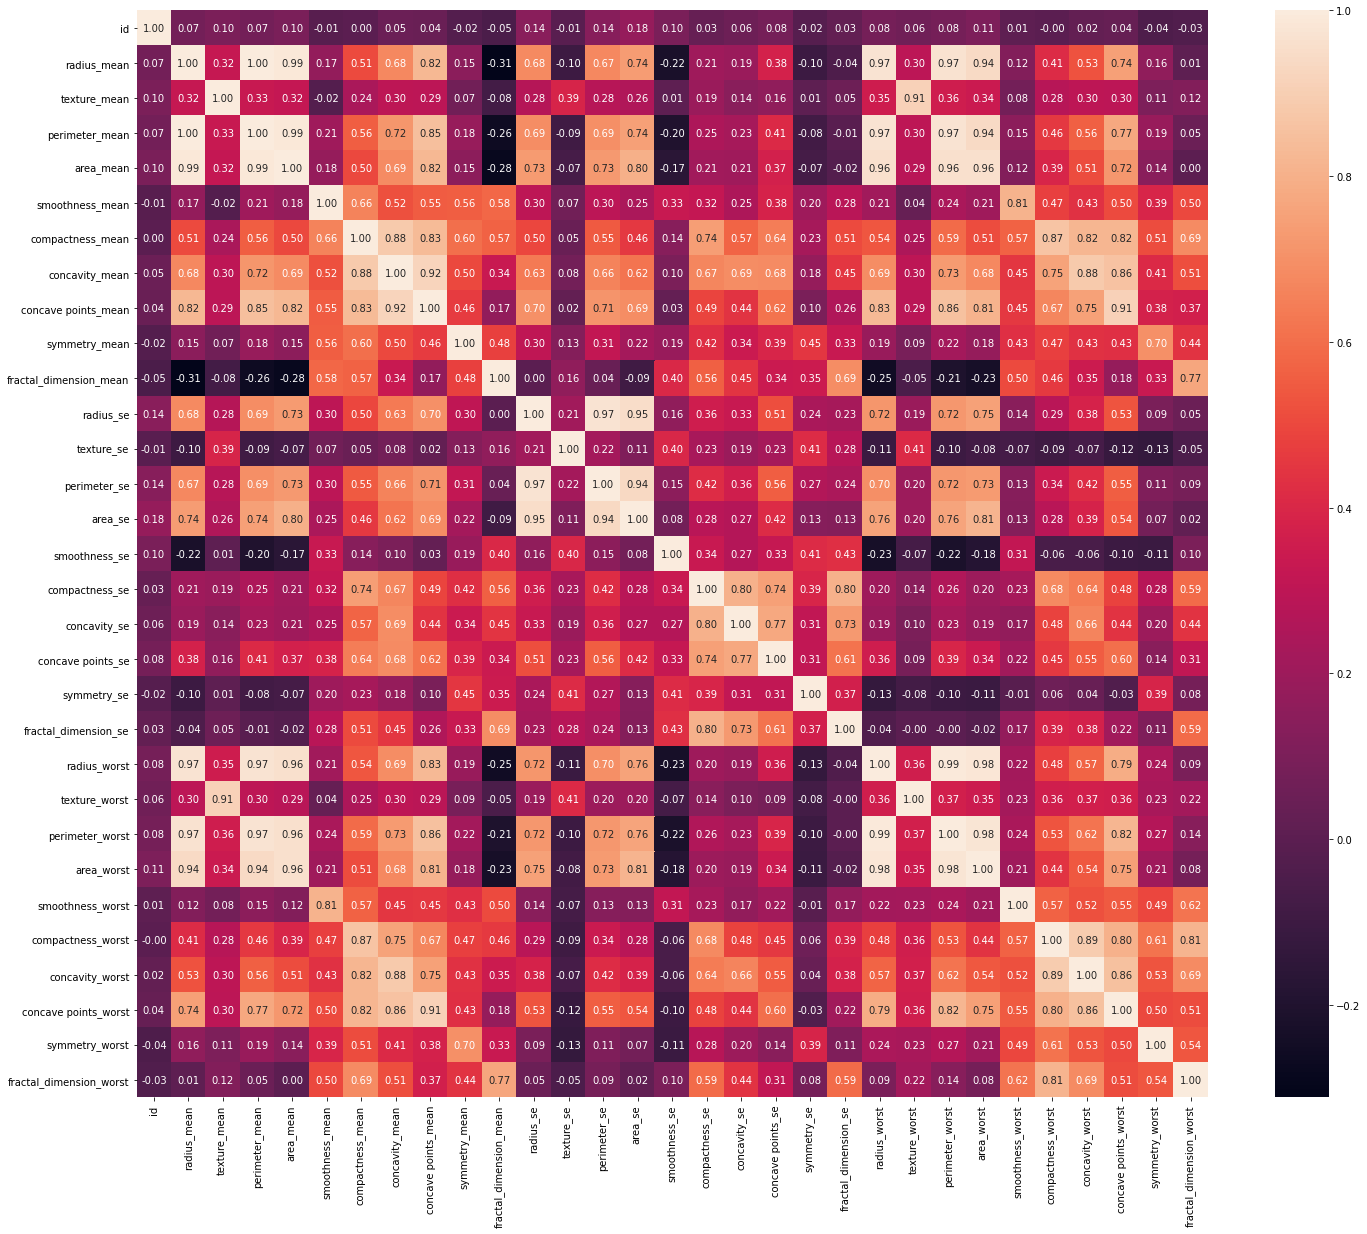

In [6]:
import seaborn as sns

plt.figure(figsize=(24,20))
sns.heatmap(df.corr(), annot=True,fmt='.2f')

## Target= diagnosis -- binary classes

In [7]:
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667)

Codifichiamo i label della nostra variabile target in numeri.

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizziamo gli array con le features.

In [9]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
X_train.shape

(398, 30)

Adesso possiamo passare alla costruzione della nostra rete neurale artificiale, il primo modello che andremo a creare sarà così composto:
* **30 nodi** nello strato di input, pari al numero di features del dataset.
* **12 nodi** nello strato nascosto, numero scelto arbitrariamente da noi. 
* **1 nodo** nello strato di output, dato che si tratta di una classificazione binaria.

La funzione di attivazione che utilizzeremo per lo strato nascosto è la **ReLU**, mentre, trattandosi di un problema di classificazione binaria, per lo strato di output utilizzeremo la sigmoide. [Qui](https://keras.io/activations/) puoi vedere l'elenco completo delle **funzioni di attivazione di base** disponibili con Keras.

In [11]:
X_train.shape[1]

30

In [12]:
import tensorflow as tf
tf.random.set_seed(667) 

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Utilizziamo il metodo compile per configurare la fase di addestramento, specificando come funzione di ottimizzazione lo **Stochastic Gradient Descent** come funzione da minimizzare la **binary cross entropy** e aggiungiamo come metrica aggiuntiva da visualizzare durante il training l'**accuracy**.

In [13]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare il numero di parametri totali che la nostra rete dovrà ottimizzare.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


Abbiamo 385 parametri in totale:
* 1 - Un peso per ogni connessione dai 30 nodi di input ai 12 nodi dell' hidden layer (30x12=360), più un bias per ogni nodonell'hidden layer (12). =360+12
* 2 - Un peso per ogni connessione dell'hidden layer all'unico nodo dello strato di output (12), più un bias (1)

Facciamo partire l'addestramento.

In [16]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9799
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9799
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9799
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9824
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9824
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9824
Epoch 11/

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98% e un valore per la funzione di costo di 0.082, verifichiamo il risultato anche sul set di test.

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9766
Loss sul test set: 0.0987
Accuracy sul test set: 0.9766


## Paramentri Reti neurali
Adesso proviamo a costruire una rete neurale artificiale profonda, cioè una rete neurale che ha più di uno strato nascosto, nello specifica la nostra rete neurale profonda sarà così composta:
* **30 nodi** nello strato di input
* **12 nodi** nel primo strato nascosto
* **8 nodi** nel secondo strato nascosto
* **4 nodi** nel secondo strato nascosto
* **1 nodo** nello strato di input

Come funzione di attivazione utilizzeremo sempre la ReLU per gli strati nascosti e la sigmoide per lo strato di output.

In [18]:
tf.random.set_seed(667) 
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


Adesso son ben 517, facciamo partire l'addestramento.

In [20]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4449
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5817
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6424
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.7296
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.7603
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7950
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.8287
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5644 - accuracy: 0.8279
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8533
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.8801
Epoch 11/

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 99% e un valore per la funzione di costo di 0.14, verifichiamo il risultato anche sul set di test.

In [21]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9591
Loss sul test set: 0.1748
Accuracy sul test set: 0.9591


Aggiungendo due nuovi strati le performance della nostra rete sono migliorate.

## Leaky ReLU
Reimplentiamo lo stesso modello, questa volta utilizzando la Leaky ReLU come funzione di attivazione per gli strati nascosti. La Leaky ReLU fa parte delle **funzioni di attivazioni avanzate** di Keras, che puoi trovare [qui](https://keras.io/layers/advanced-activations/).
<br>
Queste funzioni di attivazioni vanno aggiunte a un modello come fossero degli strati e non passate come parametro della classe Dense, come invece fatto finora.

In [22]:
tf.random.set_seed(667) 
from tensorflow.keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(4))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.6316
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.6677
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.6836
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.6824
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7254
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7480
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7645
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8005
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.7941
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8491
Epoch 11/

In [23]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9766
Loss sul test set: 0.1813
Accuracy sul test set: 0.9766


L'utilizzo della funzione Leaky ReLU ci ha permesso di ottenere un modello ancora migliore.

### Confusion Matrix
Nonostante le metriche della nostra rete neurale artificiale siano molto buone, dobbiamo tener conto du un ulteriore fattore. Quando si tratta di riconoscere un tumore, sbagliare nel diagnosticare un tumore maligno come benigno è molto più grave del classificare un tuomore benigno come maligno, infatti in quest'ultimo caso l'errore potrebbe venir fuori dopo ulteriori indagini mediche, mentre nel primo il paziente potrebbe non ricevere cure mediche necessarie per lui a causa dell'errore.
<br><br>
Questo problema è comune in molti problemi di classificazione, per affronterlo ci viene in contro una nuova metrica: la matrice di confusione.
<br>
La matrice di confusione ci permette di comprendere dove il nostro modello ha commesso degli errori.
<br><br>



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/confusion_matrix.PNG" width="800">


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


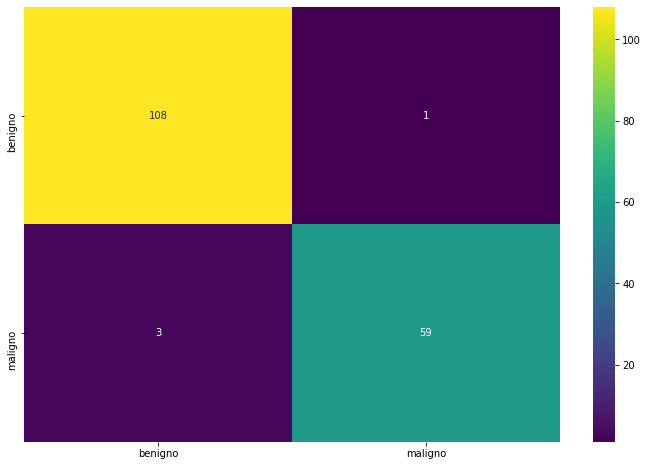

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['benigno','maligno']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');


Osservando la matrice di confusione possiamo vedere che:
1. La rete ha correttamente classificato 108 tumori benigni su 109.
2. La rete ha correttamente classificato 59 tumori maligni su 62
3. La rete ha confuso 3 tumori maligni come tumori benigni.
4. La rete ha confuso 1 tumori benigno come tumore maligno.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/roc_curve.png" width="800">

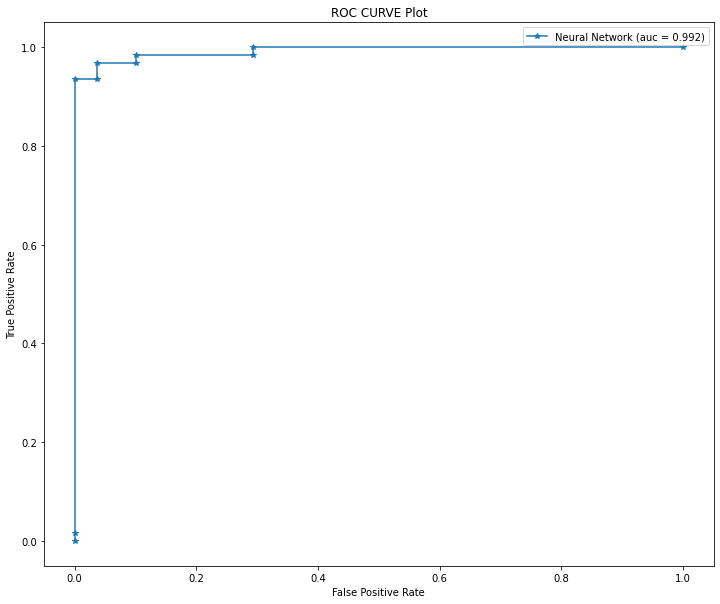

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test).ravel() #flatten array

plt.figure(figsize=(12,10))

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='*', label='Neural Network (auc = %0.3f)' % auc_keras);

# Title
plt.title('ROC CURVE Plot')

#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Legend
plt.legend();

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [ ]:
model.save('breast_cancer.h5') 

In [ ]:
load_model = load_model('breast_cancer.h5')

In [ ]:
# [[Feature1, Feature2....,Feature[30]]]
new_sample = [[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10]]
len(new_sample[0])

30

In [ ]:
scaler = MinMaxScaler()
new_sample_scaled = scaler.fit_transform(new_sample)

In [ ]:
load_model.predict(new_sample_scaled)

array([[0.5794424]], dtype=float32)

In [ ]:
input = np.where((load_model.predict(new_sample_scaled))> 0.5, 1, 0)
input

array([[1]])

Risultato = 'BENIGNO'

In [ ]:
def pred(x):
    if x==1:
        return 'benigno'
    else:
        return 'maligno'

In [ ]:
pred(input)

'benigno'

In [ ]:
##if multiclass:
#prediction = load_model.predict(new_sample_scaled)
#predict_label=np.argmax(prediction,axis=1)